<a href="https://colab.research.google.com/github/EvaldasAleknavicius/GitDemo/blob/main/PP3_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PP3: Pandas

## Section 1: Getting and knowing your data

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user). 

### Step 3. Assign it to a variable called users and use the 'user_id' as index

In [ ]:
users = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|', index_col='user_id')

### Step 4. See the first 25 entries

In [ ]:
users.head(25)

### Step 5. See the last 10 entries

In [ ]:
users.tail(10)

### Step 6. What is the number of observations in the dataset?

In [ ]:
num_observations = users.shape[0]
print(num_observations)

943


### Step 7. What is the number of columns in the dataset?

In [ ]:
num_columns = users.shape[1]
print(num_columns)

4


### Step 8. Print the name of all the columns.

In [ ]:
users.columns

Index(['age', 'gender', 'occupation', 'zip_code'], dtype='object')

### Step 9. How is the dataset indexed?

In [ ]:
print(users.index)

Int64Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            934, 935, 936, 937, 938, 939, 940, 941, 942, 943],
           dtype='int64', name='user_id', length=943)


### Step 10. What is the data type of each column?

In [ ]:
users.dtypes

age            int64
gender        object
occupation    object
zip_code      object
dtype: object

### Step 11. Print only the occupation column

In [ ]:
print(users['occupation'])

user_id
1         technician
2              other
3             writer
4         technician
5              other
           ...      
939          student
940    administrator
941          student
942        librarian
943          student
Name: occupation, Length: 943, dtype: object


### Step 12. How many different occupations are in this dataset?

In [ ]:
occ_unique = users['occupation'].nunique()
print(occ_unique)

21


### Step 13. What is the most frequent occupation?

In [ ]:
most_frequent = users['occupation'].value_counts().idxmax()
print(most_frequent)

student


### Step 14. Summarize the DataFrame.

In [ ]:
df_summary = users.describe()
print(df_summary)

              age
count  943.000000
mean    34.051962
std     12.192740
min      7.000000
25%     25.000000
50%     31.000000
75%     43.000000
max     73.000000


### Step 15. Summarize all the columns

In [ ]:
columns_summary = users.describe(include='all')
print(columns_summary)

               age gender occupation zip_code
count   943.000000    943        943      943
unique         NaN      2         21      795
top            NaN      M    student    55414
freq           NaN    670        196        9
mean     34.051962    NaN        NaN      NaN
std      12.192740    NaN        NaN      NaN
min       7.000000    NaN        NaN      NaN
25%      25.000000    NaN        NaN      NaN
50%      31.000000    NaN        NaN      NaN
75%      43.000000    NaN        NaN      NaN
max      73.000000    NaN        NaN      NaN


### Step 16. Summarize only the occupation column

In [ ]:
occupation_summary = users.occupation.describe()
print(occupation_summary)

count         943
unique         21
top       student
freq          196
Name: occupation, dtype: object


### Step 17. What is the mean age of users?

In [ ]:
avg_users_age = users['age'].mean().round(2)
print(avg_users_age)

34.05


### Step 18. What is the age with least occurrence?

In [ ]:
least_frequent = users['age'].value_counts().idxmin()
print(least_frequent)

7


## Section 2: Filtering and Sorting

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv). 

### Step 3. Assign it to a variable called euro12.

In [ ]:
euro12 = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


### Step 4. Select only the Goal column.

In [ ]:
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

### Step 5. How many team participated in the Euro2012?

In [ ]:
participants = euro12['Team'].count()
participants

16

### Step 6. What is the number of columns in the dataset?

In [ ]:
num_cols = euro12.shape[1]
num_cols

35

### Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them to a dataframe called discipline

In [ ]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


### Step 8. Sort the teams by Red Cards, then to Yellow Cards

In [ ]:
discipline.sort_values(by=['Red Cards', 'Yellow Cards'])

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


### Step 9. Calculate the mean Yellow Cards given per Team

In [ ]:
yellow_Cards = discipline['Yellow Cards'].mean()
yellow_Cards

7.4375

### Step 10. Filter teams that scored more than 6 goals

In [ ]:
euro12.loc[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


### Step 11. Select the teams that start with G

In [ ]:
starts_with_G = euro12[euro12['Team'].str.startswith('G')]
starts_with_G

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


### Step 12. Select the first 7 columns

In [ ]:
first_7_cols = euro12.iloc[:, :7]
first_7_cols

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


### Step 13. Select all columns except the last 3.

In [ ]:
all_except_last_3 = euro12.iloc[:, :-3]
all_except_last_3

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


### Step 14. Present only the Shooting Accuracy from England, Italy and Russia

In [ ]:
shooting_accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
shooting_accuracy

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


## Section 3: Grouping

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv). 

### Step 3. Assign it to a variable called drinks.

In [ ]:
drinks = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


### Step 4. Which continent drinks more beer on average?

In [ ]:
mean_beer_servings = drinks.groupby('continent')['beer_servings'].mean()
sorted_means = mean_beer_servings.sort_values(ascending=False)
continent_with_most_beer = sorted_means.index[0]
continent_with_most_beer

'EU'

### Step 5. For each continent print the statistics for wine consumption.

In [ ]:
wine_consumption = drinks.groupby('continent')['wine_servings'].describe()
wine_consumption

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


### Step 6. Print the mean alcohol consumption per continent for every column

In [ ]:
mean_alcohol = drinks.groupby('continent').mean().round(2)
mean_alcohol

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.47,16.34,16.26,3.01
AS,37.05,60.84,9.07,2.17
EU,193.78,132.56,142.22,8.62
OC,89.69,58.44,35.62,3.38
SA,175.08,114.75,62.42,6.31


### Step 7. Print the median alcohol consumption per continent for every column

In [ ]:
alcohol_median = drinks.groupby('continent').median()
alcohol_median

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


### Step 8. Print the mean, min and max values for spirit consumption.
#### This time output a DataFrame

In [ ]:
spirit_stats = drinks['spirit_servings'].agg(['mean', 'min', 'max'])
spirit_stats_df = pd.DataFrame(spirit_stats, columns=['spirit_servings'])
spirit_stats_df

,spirit_servings
mean,80.994819
min,0.000000
max,438.000000


## Section 4: Apply

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv). 

### Step 3. Assign it to a variable called crime.

In [ ]:
crime = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv')
crime

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
5,1965,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
6,1966,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
7,1967,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
8,1968,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600
9,1969,201385000,7410900,661870,6749000,14760,37170,298850,311090,1981900,3888600,878500


### Step 4. What is the type of the columns?

In [ ]:
crime.dtypes

Year                  int64
Population            int64
Total                 int64
Violent               int64
Property              int64
Murder                int64
Forcible_Rape         int64
Robbery               int64
Aggravated_assault    int64
Burglary              int64
Larceny_Theft         int64
Vehicle_Theft         int64
dtype: object

##### Have you noticed that the type of Year is int64. But pandas has a different type to work with Time Series. Let's see it now.

### Step 5. Convert the type of the column Year to datetime64

In [ ]:
crime['Year'] = pd.to_datetime(crime['Year'], format='%Y')
crime

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800
5,1965-01-01,193526000,4739400,387390,4352000,9960,23410,138690,215330,1282500,2572600,496900
6,1966-01-01,195576000,5223500,430180,4793300,11040,25820,157990,235330,1410100,2822000,561200
7,1967-01-01,197457000,5903400,499930,5403500,12240,27620,202910,257160,1632100,3111600,659800
8,1968-01-01,199399000,6720200,595010,6125200,13800,31670,262840,286700,1858900,3482700,783600
9,1969-01-01,201385000,7410900,661870,6749000,14760,37170,298850,311090,1981900,3888600,878500


### Step 6. Set the Year column as the index of the dataframe

In [ ]:
crime.set_index('Year', inplace=True)

### Step 7. Delete the Total column

In [ ]:
crime = crime.drop(columns='Total')

### Step 8. Group the year by decades and sum the values

#### Pay attention to the Population column number, summing this column is a mistake

In [ ]:
df_decades = crime.resample('10AS').sum()
df_decades = df_decades.drop(columns=['Population'])
df_decades

,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,
1960-01-01,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


### Step 9. What is the most dangerous decade to live in the US?

In [ ]:
df_decades.groupby('Year')['Violent'].max()

## Section 5: Merge

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd

### Step 2. Create the 3 DataFrames based on the following raw data

In [ ]:
raw_data_1 = {
        'subject_id': ['1', '2', '3', '4', '5'],
        'first_name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'], 
        'last_name': ['Anderson', 'Ackerman', 'Ali', 'Aoni', 'Atiches']}

raw_data_2 = {
        'subject_id': ['4', '5', '6', '7', '8'],
        'first_name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'], 
        'last_name': ['Bonder', 'Black', 'Balwner', 'Brice', 'Btisan']}

raw_data_3 = {
        'subject_id': ['1', '2', '3', '4', '5', '7', '8', '9', '10', '11'],
        'test_id': [51, 15, 15, 61, 16, 14, 15, 1, 61, 16]}

### Step 3. Assign each to a variable called data1, data2, data3

In [ ]:
data1 = pd.DataFrame(raw_data_1, columns=['subject_id', 'first_name', 'last_name']).set_index('subject_id')
data2 = pd.DataFrame(raw_data_2, columns=['subject_id', 'first_name', 'last_name']).set_index('subject_id')
data3 = pd.DataFrame(raw_data_3, columns=['subject_id', 'test_id']).set_index('subject_id')

### Step 4. Join the two dataframes along rows and assign all_data

In [ ]:
all_data = pd.concat([data1, data2])
all_data

### Step 5. Join the two dataframes along columns and assing to all_data_col

In [ ]:
all_data_col = data2.merge(data3, left_on='subject_id', right_on='subject_id')
all_data_col

### Step 6. Print data3

In [ ]:
data3

,test_id
subject_id,
1,51
2,15
3,15
4,61
5,16
7,14
8,15
9,1
10,61


### Step 7. Merge all_data and data3 along the subject_id value

In [ ]:
all_data.merge(data3, left_on='subject_id', right_on='subject_id')

,first_name,last_name,test_id
subject_id,,,
1,Alex,Anderson,51
2,Amy,Ackerman,15
3,Allen,Ali,15
4,Alice,Aoni,61
4,Billy,Bonder,61
5,Ayoung,Atiches,16
5,Brian,Black,16
7,Bryce,Brice,14
8,Betty,Btisan,15


### Step 8. Merge only the data that has the same 'subject_id' on both data1 and data2

In [ ]:
data1.merge(data2, how='inner', on='subject_id')

,first_name_x,last_name_x,first_name_y,last_name_y
subject_id,,,,
4,Alice,Aoni,Billy,Bonder
5,Ayoung,Atiches,Brian,Black


### Step 9. Merge all values in data1 and data2, with matching records from both sides where available.

In [ ]:
merged_data = pd.merge(data1, data2, on='subject_id', how='outer')
merged_data

## Section 6: Stats

### Introduction:

The data have been modified to contain some missing values, identified by NaN.  
Using pandas should make this exercise
easier, in particular for the bonus question.

You should be able to perform all of these operations without using
a for loop or other looping construct.


1. The data in 'wind.data' has the following format:

In [ ]:
"""
Yr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL
61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04
61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83
61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71
"""

'\nYr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL\n61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04\n61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83\n61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71\n'

   The first three columns are year, month and day.  The
   remaining 12 columns are average windspeeds in knots at 12
   locations in Ireland on that day.   

   More information about the dataset go [here](wind.desc).

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data)

### Step 3. Assign it to a variable called data and replace the first 3 columns by a proper datetime index.

In [ ]:
data = pd.read_fwf('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data')
data = data.assign(index = data.Yr.astype(str) +'.' + data.Mo.astype(str) +'.'+ data.Dy.astype(str))
data = data.drop(columns=['Yr', 'Mo', 'Dy'])
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,index
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,61.1.1
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,61.1.2
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,61.1.3
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,61.1.4
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,61.1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,78.12.27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,78.12.28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,78.12.29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,78.12.30


### Step 4. Year 2061? Do we really have data from this year? Create a function to fix it and apply it.

In [ ]:
add_19 = lambda x: "19" + str(x)
data.iloc[:,12] = data.iloc[:,12].apply(add_19)
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,index
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,1961.1.1
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,1961.1.2
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,1961.1.3
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,1961.1.4
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,1961.1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08,1978.12.27
6570,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46,1978.12.28
6571,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58,1978.12.29
6572,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79,1978.12.30


### Step 5. Set the right dates as the index. Pay attention at the data type, it should be datetime64[ns].

In [ ]:
data.index = pd.to_datetime(data.index)
data = data.set_index('index')
data

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
index,,,,,,,,,,,,
1961.1.1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1961.1.2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
1961.1.3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
1961.1.4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
1961.1.5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...
1978.12.27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
1978.12.28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
1978.12.29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58


### Step 6. Compute how many values are missing for each location over the entire record.  
#### They should be ignored in all calculations below. 

In [ ]:
data.isna().sum()

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

### Step 7. Compute how many non-missing values there are in total.

In [ ]:
data.count().sum()

78857

### Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
#### A single number for the entire dataset.

In [ ]:
data = data.dropna()
windspeeds = data.values.mean()
windspeeds

10.222465245951728

### Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days 

#### A different set of numbers for each location.

In [ ]:
loc_stats = data.describe()
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
25%,8.120000,6.670000,8.000000,3.580000,6.750000,4.000000,6.000000,5.090000,5.370000,5.330000,8.710000,10.710000
50%,11.710000,10.170000,10.920000,5.750000,9.960000,6.830000,9.210000,8.080000,8.170000,8.290000,12.500000,15.000000
75%,15.920000,14.040000,14.670000,8.420000,13.540000,9.670000,12.960000,11.420000,11.190000,11.630000,16.880000,19.830000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000


### Step 10. Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.

#### A different set of numbers for each day.

In [ ]:
# day_stats = data.groupby('index').agg(['min', 'max', 'mean', 'std'])
# day_stats

### Step 11. Find the average windspeed in January for each location.  
#### Treat January 1961 and January 1962 both as January.

### Step 12. Downsample the record to a yearly frequency for each location.

In [ ]:
# df_downsampled = data.resample('Y', on='index').mean()

### Step 13. Downsample the record to a monthly frequency for each location.

In [ ]:
# df_downsampled = data.resample('M', on='index').mean()

### Step 14. Downsample the record to a weekly frequency for each location.

### Step 15. Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

## Section 7: Visualization

### Introduction:

This exercise is based on the titanic Disaster dataset avaiable at [Kaggle](https://www.kaggle.com/c/titanic).  
To know more about the variables check [here](https://www.kaggle.com/c/titanic/data)


### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)

### Step 3. Assign it to a variable titanic 

In [ ]:
titanic = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Step 4. Set PassengerId as the index 

In [ ]:
titanic.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### Step 5. Create a pie chart presenting the male/female proportion

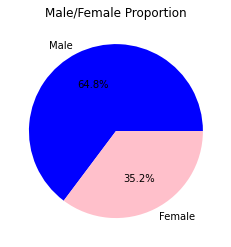

In [ ]:
proportion = titanic['Sex'].value_counts()

plt.pie(proportion, labels=['Male', 'Female'], colors=['blue', 'pink'], autopct='%1.1f%%')
plt.title('Male/Female Proportion')
plt.show()

### Step 6. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

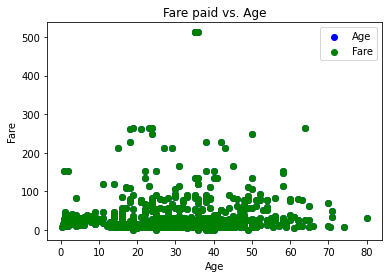

In [ ]:
plt.scatter(titanic['Age'], titanic['Fare'], color='blue', label='Age')
plt.scatter(titanic['Age'], titanic['Fare'], color='green', label='Fare')

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Fare paid vs. Age')
plt.legend()

plt.show()

### Step 7. How many people survived?

In [ ]:
survived = titanic['Survived'].value_counts()[1]
survived

342

### Step 8. Create a histogram with the Fare payed

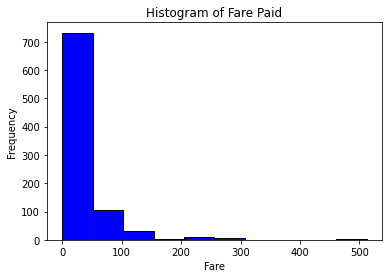

In [ ]:
plt.hist(titanic['Fare'], bins=10, color='blue', edgecolor='black')

plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fare Paid')

plt.show()

### BONUS: Create your own question and answer it.

What is the average Fare?

In [ ]:
fare_avg = titanic.Fare.mean().round(2)
fare_avg

32.2

## Section 8: Creating Series and DataFrames

### Introduction:

This time you will create the data.



### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd

### Step 2. Create a data dictionary that looks like the DataFrame below

In [ ]:
data = {
        "evolution": ["Ivysaur", "Charmeleon", "Wartortle", "Metapod"],
        "hp": [45, 39, 44, 45],
        "name": ["Bulbasaur", "Charmander", "Squirtle", "Caterpie"],
        "pokedex": ["yes", "no", "yes", "no"],
        "type": ["grass", "fire", "water", "bug"],
    }

### Step 3. Assign it to a variable called pokemon

In [ ]:
pokemon = pd.DataFrame(data)
pokemon

,evolution,hp,name,pokedex,type
0,Ivysaur,45,Bulbasaur,yes,grass
1,Charmeleon,39,Charmander,no,fire
2,Wartortle,44,Squirtle,yes,water
3,Metapod,45,Caterpie,no,bug


### Step 4. Ops...it seems the DataFrame columns are in alphabetical order. Place  the order of the columns as name, type, hp, evolution, pokedex

In [ ]:
pokemon.reindex(columns=['type', 'hp', 'evolution', 'pokedex'])

,type,hp,evolution,pokedex
0,grass,45,Ivysaur,yes
1,fire,39,Charmeleon,no
2,water,44,Wartortle,yes
3,bug,45,Metapod,no


### Step 5. Add another column called place, and insert what you have in mind.

In [ ]:
pokemon['place'] = ['3rd', '4th', '1st', '2nd']
pokemon

,evolution,hp,name,pokedex,type,place
0,Ivysaur,45,Bulbasaur,yes,grass,3rd
1,Charmeleon,39,Charmander,no,fire,4th
2,Wartortle,44,Squirtle,yes,water,1st
3,Metapod,45,Caterpie,no,bug,2nd


### Step 6. Present the type of each column

In [ ]:
pokemon.dtypes

evolution    object
hp            int64
name         object
pokedex      object
type         object
place        object
dtype: object

### BONUS: Create your own question and answer it.

Sort data by place column in reverse order.

In [ ]:
pokemon.sort_values('place', ascending=False)

,evolution,hp,name,pokedex,type,place
1,Charmeleon,39,Charmander,no,fire,4th
0,Ivysaur,45,Bulbasaur,yes,grass,3rd
3,Metapod,45,Caterpie,no,bug,2nd
2,Wartortle,44,Squirtle,yes,water,1st


## Section: 9 Time Series

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [ ]:
apple = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 4.  Check out the type of the columns

In [ ]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [ ]:
apple['Date'] = pd.to_datetime(apple['Date'])
apple.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
dtype: object

### Step 6.  Set the date as the index

In [ ]:
apple.set_index('Date')

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 7.  Is there any duplicate dates?

No

In [ ]:
duplicates = apple.duplicated('Date')
dublicated = duplicates[duplicates == True].index
dublicated

Int64Index([], dtype='int64')

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [ ]:
apple.set_index('Date').sort_index(ascending=True)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03


### Step 9. Get the last business day of each month

In [ ]:
# last_bday = apple['Date'].apply(lambda x: x[x.is_month_end & x.is_business_day][-1])

### Step 10.  What is the difference in days between the first day and the oldest

In [ ]:
diff_in_days = apple['Date'].max() - apple['Date'].min()
diff_in_days

Timedelta('12261 days 00:00:00')

### Step 11.  How many months in the data we have?

In [ ]:
# num_months = (apple['Date'].max() - apple['Date'].min()) // pd.DateOffset(months=1) + 1
# num_months

TypeError: ignored

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

<Axes: >

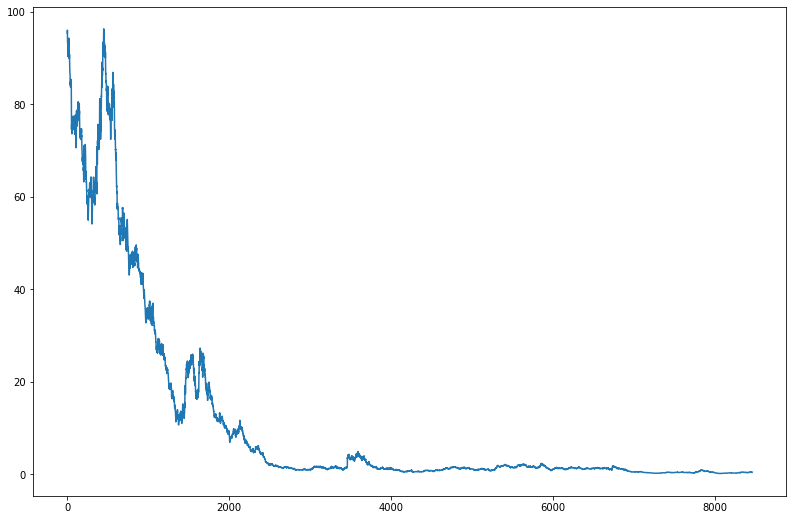

In [ ]:
plt.figure(figsize=(13.5, 9))
apple['Adj Close'].plot()

## Section 10: Deleting

### Introduction:

This exercise is a adaptation from the UCI Wine dataset.
The only pupose is to practice deleting data with pandas.

### Step 1. Import the necessary libraries

In [ ]:
import pandas as pd
import numpy as np

### Step 2. Import the dataset from this [address](https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data). 

### Step 3. Assign it to a variable called wine

In [ ]:
wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data')
wine

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Step 4. Delete the first, fourth, seventh, nineth, eleventh, thirteenth and fourteenth columns

In [ ]:
wine = wine.drop(columns=wine.columns[[0,3,6,8,10,12,13]])

### Step 5. Assign the columns as below:

The attributes are (donated by Riccardo Leardi, riclea '@' anchem.unige.it):  
1) alcohol  
2) malic_acid  
3) alcalinity_of_ash  
4) magnesium  
5) flavanoids  
6) proanthocyanins  
7) hue 

In [ ]:
wine.columns = ['alcohol', 'malic_acid', 'alcalinity_of_ash', 'magnesium', 'flavanoids', 'proanthocyanins', 'hue']

### Step 6. Set the values of the first 3 rows from alcohol as NaN

In [ ]:
wine.loc[:2,: ] = pd.np.nan
wine

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13.24,2.59,21.0,118.0,2.69,1.82,1.04
4,14.20,1.76,15.2,112.0,3.39,1.97,1.05
...,...,...,...,...,...,...,...
172,13.71,5.65,20.5,95.0,0.61,1.06,0.64
173,13.40,3.91,23.0,102.0,0.75,1.41,0.70
174,13.27,4.28,20.0,120.0,0.69,1.35,0.59
175,13.17,2.59,20.0,120.0,0.68,1.46,0.60


### Step 7. Now set the value of the rows 3 and 4 of magnesium as NaN

In [ ]:
wine.iloc[2:4, 3] = pd.np.nan
wine

<ipython-input-123-b39bd5486c84>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  wine.iloc[2:4, 3] = pd.np.nan


,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13.24,2.59,21.0,NaN,2.69,1.82,1.04
4,14.20,1.76,15.2,112.0,3.39,1.97,1.05
...,...,...,...,...,...,...,...
172,13.71,5.65,20.5,95.0,0.61,1.06,0.64
173,13.40,3.91,23.0,102.0,0.75,1.41,0.70
174,13.27,4.28,20.0,120.0,0.69,1.35,0.59
175,13.17,2.59,20.0,120.0,0.68,1.46,0.60


### Step 8. Fill the value of NaN with the number 10 in alcohol and 100 in magnesium

In [ ]:
wine['alcohol'].fillna(10, inplace=True)
wine['magnesium'].fillna(100, inplace=True)
wine

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,10.00,NaN,NaN,100.0,NaN,NaN,NaN
1,10.00,NaN,NaN,100.0,NaN,NaN,NaN
2,10.00,NaN,NaN,100.0,NaN,NaN,NaN
3,13.24,2.59,21.0,100.0,2.69,1.82,1.04
4,14.20,1.76,15.2,112.0,3.39,1.97,1.05
...,...,...,...,...,...,...,...
172,13.71,5.65,20.5,95.0,0.61,1.06,0.64
173,13.40,3.91,23.0,102.0,0.75,1.41,0.70
174,13.27,4.28,20.0,120.0,0.69,1.35,0.59
175,13.17,2.59,20.0,120.0,0.68,1.46,0.60


### Step 9. Count the number of missing values

In [ ]:
nan_count = wine.isna().sum()
nan_count.sum()

15

### Step 10.  Create an array of 10 random numbers up until 10

In [ ]:
arr = np.random.randint(10, size=10)
arr

array([0, 1, 4, 1, 2, 2, 7, 8, 4, 4])

### Step 11.  Use random numbers you generated as an index and assign NaN value to each of cell.

In [ ]:
wine.loc[arr, :] = pd.np.nan

<ipython-input-133-b02d0d80b427>:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  wine.loc[arr, :] = pd.np.nan


### Step 12.  How many missing values do we have?

In [ ]:
nan_count = wine.isna().sum()
nan_count.sum()

42

### Step 13. Delete the rows that contain missing values

In [ ]:
wine = wine.dropna()
wine

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
3,13.24,2.59,21.0,100.0,2.69,1.82,1.04
5,14.39,1.87,14.6,96.0,2.52,1.98,1.02
6,14.06,2.15,17.6,121.0,2.51,1.25,1.06
9,14.10,2.16,18.0,105.0,3.32,2.38,1.25
10,14.12,1.48,16.8,95.0,2.43,1.57,1.17
...,...,...,...,...,...,...,...
172,13.71,5.65,20.5,95.0,0.61,1.06,0.64
173,13.40,3.91,23.0,102.0,0.75,1.41,0.70
174,13.27,4.28,20.0,120.0,0.69,1.35,0.59
175,13.17,2.59,20.0,120.0,0.68,1.46,0.60


### Step 14. Print only the non-null values in alcohol

In [ ]:
print(wine['alcohol'][wine['alcohol'].notnull()])

3      13.24
5      14.39
6      14.06
9      14.10
10     14.12
       ...  
172    13.71
173    13.40
174    13.27
175    13.17
176    14.13
Name: alcohol, Length: 171, dtype: float64


### Step 15.  Reset the index, so it starts with 0 again

In [ ]:
wine = wine.reset_index(drop=True)
wine

,alcohol,malic_acid,alcalinity_of_ash,magnesium,flavanoids,proanthocyanins,hue
0,13.24,2.59,21.0,100.0,2.69,1.82,1.04
1,14.39,1.87,14.6,96.0,2.52,1.98,1.02
2,14.06,2.15,17.6,121.0,2.51,1.25,1.06
3,14.10,2.16,18.0,105.0,3.32,2.38,1.25
4,14.12,1.48,16.8,95.0,2.43,1.57,1.17
...,...,...,...,...,...,...,...
166,13.71,5.65,20.5,95.0,0.61,1.06,0.64
167,13.40,3.91,23.0,102.0,0.75,1.41,0.70
168,13.27,4.28,20.0,120.0,0.69,1.35,0.59
169,13.17,2.59,20.0,120.0,0.68,1.46,0.60
